In [781]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import copy

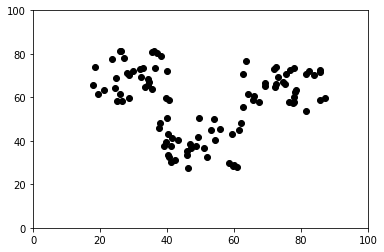

In [782]:
# Generating 100 random points

x = []
y = []

spread = 25

x1 = 30
y1 = 70
for i in range(0,33):
    x.append(x1 + spread * (rand.random()-0.5))
    y.append(y1 + spread * (rand.random()-0.5))

x2 = 75
y2 = 65
for i in range(0,33):
    x.append(x2 + spread * (rand.random()-0.5))
    y.append(y2 + spread * (rand.random()-0.5)) 

x3 = 50
y3 = 40
for i in range(0,34):
    x.append(x3 + spread * (rand.random()-0.5))
    y.append(y3 + spread * (rand.random()-0.5))    

plt.plot(x, y, 'ko')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [783]:
data = pd.DataFrame({'x' : x, 'y' : y})
data['color'] = 'k' # initial colour black .i.e. k

In [784]:
data

,x,y,color
0,36.247413,81.098068,k
1,38.328679,78.985822,k
2,23.584433,77.589884,k
3,31.903968,73.144605,k
4,34.518160,67.263875,k
5,29.824784,72.205552,k
6,35.442729,81.061157,k
7,26.548011,58.087087,k
8,35.564187,63.904945,k
9,24.802746,69.051795,k


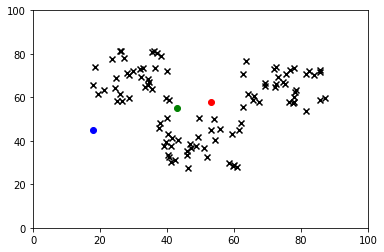

In [785]:
# Initialize value of the 3 centroids to arbitary values in the range

k = 3 
centroids = {
    i+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for i in range(k)
}
    
plt.scatter(data['x'], data['y'], marker = 'x', color = 'k')
color_map = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i], alpha = 1)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [786]:
# To plot the points and centroid with appropriate colour coding

def plot(data, centroids, title):
    plt.scatter(data['x'], data['y'], color = data['color'], marker = 'x', alpha = 0.5)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color = color_map[i], alpha = 1, edgecolor = 'k')
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title(title)
    plt.show()

In [787]:
# Single linkage clustering (based on minimum distance to centroids) 

def cluster_assignment(data, centroids):
    for i in centroids.keys():
        data['d_{}'.format(i)] = (
            np.sqrt(
                (data['x'] - centroids[i][0]) ** 2
                + (data['y'] - centroids[i][1]) ** 2
            )
        )
    distances = ['d_{}'.format(i) for i in centroids.keys()]
    
    # computing the closest centroid
    data['closest'] = data.loc[:, distances].idxmin(axis=1) # min dist
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('d_'))) # cluster value
    
    # color coding
    data['color'] = data['closest'].map(lambda x: color_map[x])
    return data

In [788]:
# Update the centroid coordinates to the mean value of the coordinates of the points in the cluster

def update_centroids(data, old_centroids):
    centroids = copy.deepcopy(old_centroids) # deepcopy used to avoid updates to the acutal parameters 
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['x'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['y'])
    return centroids

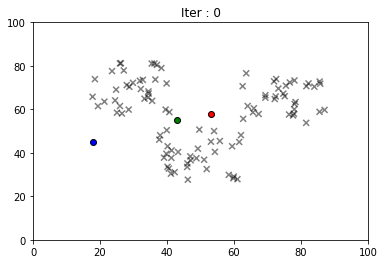

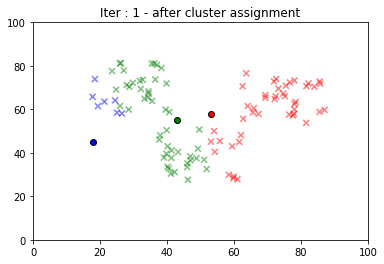

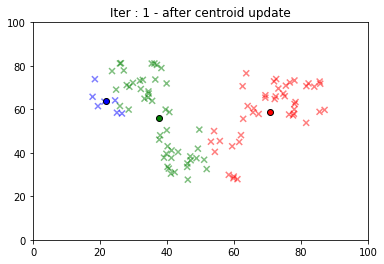

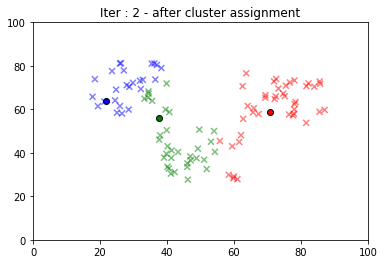

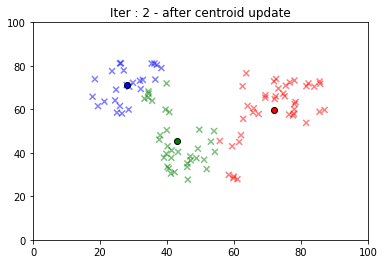

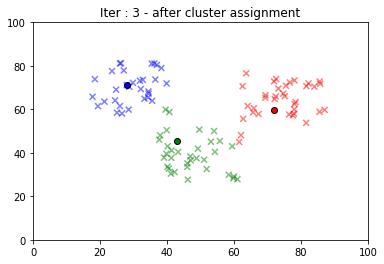

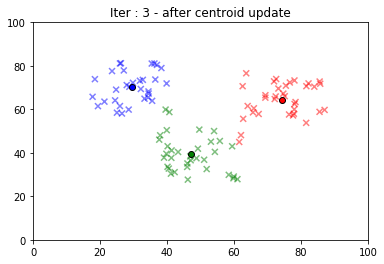

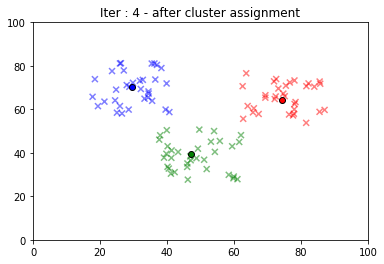

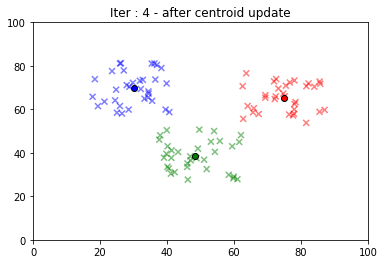

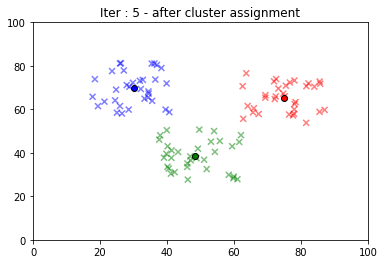

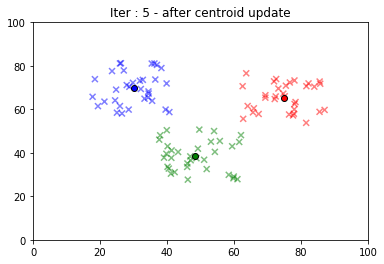

In [789]:
# Continue until all assigned categories don't change any more

iteration = 1

old_centroids = copy.deepcopy(centroids)
old_data = data

title = "Iter : " + str(0)
plot(old_data, old_centroids, title)

while True:
    new_data = cluster_assignment(old_data, old_centroids)
    title = "Iter : " + str(iteration) + " - after cluster assignment"
    plot(new_data, old_centroids, title)
    new_centroids = update_centroids(new_data, old_centroids)
    title = "Iter : " + str(iteration) + " - after centroid update"
    plot(new_data, new_centroids, title)
    iteration += 1
    if old_centroids == new_centroids:
        break
    else:    
        old_centroids = new_centroids    
